In [1]:
import pandas as pd
from ast import literal_eval
import math
import numpy as np
import matplotlib.pyplot as plt
from math import cos, sin, radians, pi
import lidar_to_grid_map as lg

ModuleNotFoundError: ignored

In [2]:
# measures = pd.read_csv("lidar_data.csv", index_col=0)
measures = pd.read_csv("drive/MyDrive/igrovi/lidar_data_new.csv", index_col=0)

In [ ]:
print(measures.shape)
measures.head()

(2820, 93)


,x,y,player_angle,distance_0,distance_1,distance_2,distance_3,distance_4,distance_5,distance_6,...,distance_80,distance_81,distance_82,distance_83,distance_84,distance_85,distance_86,distance_87,distance_88,distance_89
0,640.0,360.0,-0.1,0.442652,0.440641,0.440786,0.443091,0.336859,0.243653,0.202081,...,0.195712,0.526355,0.556880,0.529587,0.507200,0.700037,0.678870,0.662076,0.649180,0.639834
1,640.0,360.0,-0.2,0.643457,0.444199,0.441244,0.440460,0.441827,0.404406,0.276602,...,0.179170,0.190202,0.509351,0.551274,0.540730,0.516335,0.496361,0.687453,0.668835,0.654303
2,640.0,360.0,-0.3,0.660114,0.647715,0.638828,0.442253,0.440535,0.440971,0.443571,...,0.166742,0.175041,0.185158,0.197538,0.532010,0.552867,0.526294,0.504503,0.696898,0.676356
3,640.0,360.0,-0.4,0.684678,0.666641,0.652628,0.642257,0.443671,0.441012,0.440519,...,0.157397,0.163633,0.171251,0.180535,0.191873,0.514499,0.557695,0.537143,0.513393,0.493960
4,640.0,360.0,-0.5,0.501879,0.693849,0.673920,0.658221,0.646314,0.637883,0.441894,...,0.150468,0.155075,0.160781,0.167771,0.176294,0.186688,0.498543,0.537835,0.548959,0.523087


In [ ]:
def measures_read(df):
    """
    Reading LIDAR laser beams (angles and corresponding distance data)
    """

    distances = []
    for index, row in df.iterrows():
        # angles_one_measure = []
        distances_one_measure = []
        row_values = row.values
        
        measures = []
        for s in row_values:
            # nan values can be contained in dataset
            if not pd.isna(s):
                # as we store measures in string format (angle, distance) we should evaluate these values
                measure_eval = s
                measures.append(measure_eval)
            else:
                measures.append(None)

        for measure in measures:
            # angles_one_measure.append(float(measure[0] or 0))
            distances_one_measure.append(float(measure or 0))

        # angles.append(np.array(angles_one_measure))
        distances.append(np.array(distances_one_measure))

    # angles = np.stack(angles, axis=0)
    distances = np.stack(distances, axis=0)  
    return distances

def angles_read(df):
    angles = []

    for player_angle in df:
        # print(value)
        # angles_one_measure = []
        angles_one_measure = []

        lidar_max_angle = math.pi
        lidar_step = 4*math.pi/180
        lidar_num_steps = 2*180//4

        angle = player_angle - lidar_max_angle
        for i in range(lidar_num_steps):

            angles_one_measure.append(angle)

            angle += lidar_step

        angles.append(np.array(angles_one_measure))
    angles = np.stack(angles, axis=0)
    return angles

    #     row_values = row.values
        
    #     measures = []
    #     for s in row_values:
    #         # nan values can be contained in dataset
    #         if not pd.isna(s):
    #             # as we store measures in string format (angle, distance) we should evaluate these values
    #             measure_eval = s
    #             measures.append(measure_eval)
    #         else:
    #             measures.append(None)

    #     for measure in measures:
    #         # angles_one_measure.append(float(measure[0] or 0))
    #         angles_one_measure.append(float(measure or 0))

    #     # angles.append(np.array(angles_one_measure))
    #     angles.append(np.array(angles_one_measure))

    # # angles = np.stack(angles, axis=0)
    # angles = np.stack(angles, axis=0)  
    

# angles, distances = measures_read(measures.iloc[:, 3:])

In [ ]:
distances = measures_read(measures.iloc[:, 3:])

In [ ]:
angles = angles_read(measures.iloc[:, 2])

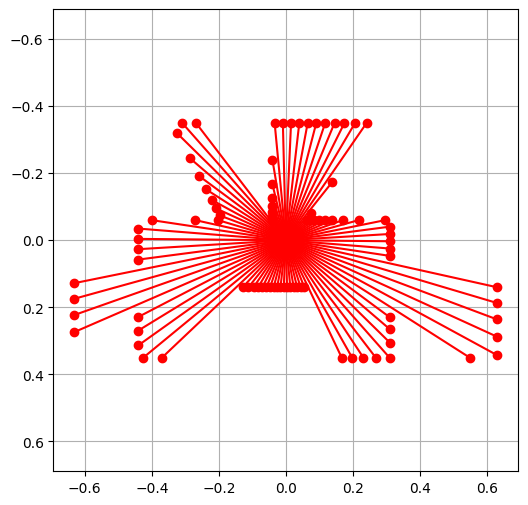

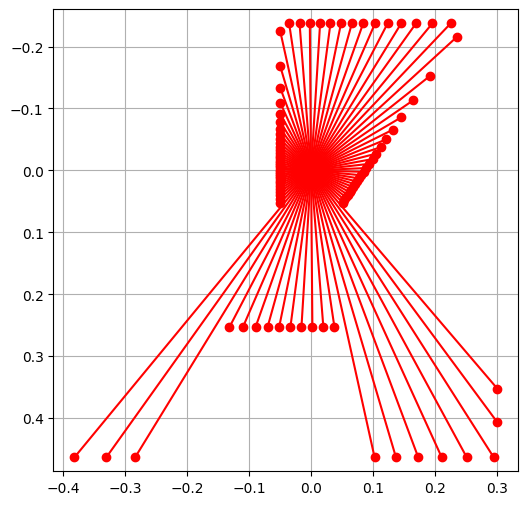

In [ ]:
i_s = [1, 40]
for i in i_s:
    dist = measures_read(measures.iloc[:, 3:])
    ang = angles_read(measures.iloc[:, 2])
    dist[i][dist[i] > 1000] = np.max(dist[i][dist[i] <= 1000])
    ox = np.sin(ang[i]) * dist[i]
    oy = np.cos(ang[i]) * dist[i]
    plt.figure(figsize=(6,6))
    # plt.plot([oy, np.zeros(np.size(oy))], [ox, np.zeros(np.size(oy))], "ro-") # lines from 0,0 to the
    plt.plot([oy, np.zeros(np.size(oy))], [ox, np.zeros(np.size(oy))], "ro-") # lines from 0,0 to the
    plt.axis("equal")
    bottom, top = plt.ylim()  # return the current ylim
    plt.ylim((top, bottom)) # rescale y axis, to match the grid orientation
    plt.grid(True)
    plt.show()

In [ ]:
data = []
for i in range(0, measures.shape[0]): #measures.shape[0]
    xyreso = 0.02  # x-y grid resolution
    yawreso = math.radians(3.1)  # yaw angle resolution [rad]
    dist = measures_read(measures.iloc[:, 3:])
    ang = angles_read(measures.iloc[:, 2])
    dist[i][dist[i] > 1000] = np.max(dist[i][dist[i] <= 1000])
    ox = np.sin(ang[i]) * dist[i]
    oy = np.cos(ang[i]) * dist[i]
    
    pmap, minx, maxx, miny, maxy, xyreso = lg.generate_ray_casting_grid_map(ox, oy, xyreso, breshen=False)
    data.append(pmap)
    
    xyres = np.array(pmap).shape
    plt.figure(figsize=(20,8))
    plt.subplot(122)
    plt.imshow(pmap, cmap = "PiYG_r")
    plt.clim(-0.4, 1.4)
    plt.gca().set_xticks(np.arange(-.5, xyres[1], 1), minor = True)
    plt.gca().set_yticks(np.arange(-.5, xyres[0], 1), minor = True)
    plt.grid(True, which="minor", color="w", linewidth = .6, alpha = 0.5)
    plt.colorbar()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
data[1][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
stacked = np.stack(data, axis=0).reshape(2820, -1)
print(np.stack(data, axis=0).shape, stacked.shape)

(2820, 100, 100) (2820, 10000)


In [ ]:
pd.DataFrame(stacked).to_csv("/content/drive/MyDrive/igrovi/image_dset_output.csv")

In [3]:
r = pd.read_csv("/content/drive/MyDrive/igrovi/image_dset_output.csv", index_col=0)

In [4]:
r.head(20)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
7,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
8,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
9,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [ ]:
measures.iloc[:, :3]

,x,y,player_angle
0,640.000000,360.000000,-0.1
1,640.000000,360.000000,-0.2
2,640.000000,360.000000,-0.3
3,640.000000,360.000000,-0.4
4,640.000000,360.000000,-0.5
...,...,...,...
2815,983.292259,492.637494,-18.1
2816,987.025416,496.112194,-18.1
2817,990.758573,499.586895,-18.1
2818,994.491729,503.061595,-18.1


In [5]:
measures = pd.concat([measures.iloc[:, :3], r], axis=1)

In [10]:
measures = measures[measures['0']==0.5]

In [11]:
measures.to_csv("/content/drive/MyDrive/igrovi/image_dset_output_wthcoords.csv")

In [ ]:
!ls

drive  lidar_to_grid_map.py  __pycache__  sample_data


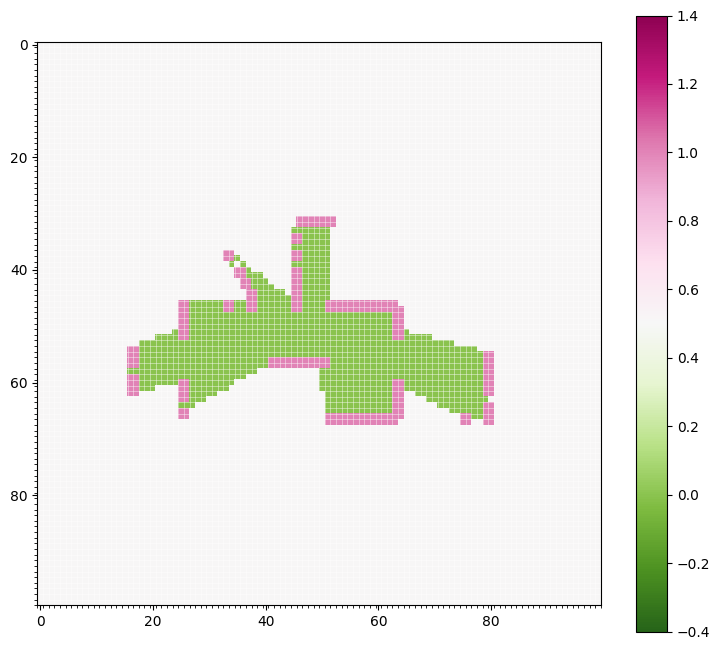

In [ ]:
xyres = np.array(pmap).shape
plt.figure(figsize=(20,8))
plt.subplot(122)
plt.imshow(pmap, cmap = "PiYG_r")
plt.clim(-0.4, 1.4)
plt.gca().set_xticks(np.arange(-.5, xyres[1], 1), minor = True)
plt.gca().set_yticks(np.arange(-.5, xyres[0], 1), minor = True)
plt.grid(True, which="minor", color="w", linewidth = .6, alpha = 0.5)
plt.colorbar()
plt.show()